In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [64]:
# https://git.arts.ac.uk/pages/23038800/23038800.github.io/dataset.html
# Importing df | Importando df
df = pd.read_csv('./web-scraped_data.csv')

df.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


In [65]:
df['Salary'] = df['Salary'].round(0)

In [66]:
df.describe()

,Salary,Salary in USD,Year
count,3.951000e+03,3951.000000,3951.000000
mean,1.982900e+05,142753.106808,2022.576816
std,6.725310e+05,68281.388301,0.682222
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,92280.000000,2022.000000
50%,1.400000e+05,136600.000000,2023.000000
75%,1.898750e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [67]:
df.shape

(3951, 11)

3951 rows 11 columns

In [68]:
df.columns


Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')

In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


In [70]:
df.isnull().sum()


Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

there is no null values

In [71]:
df.duplicated().sum()

0

no duplications

In [72]:
df["Job Title"].nunique()

120

There is 120 jobs listed in dataset

In [73]:
top_25_job_title = df["Job Title"].value_counts()[:25]
top_25_job_title

Job Title
Data Engineer                               803
Data Scientist                              731
Data Analyst                                542
Machine Learning Engineer                   362
Analytics Engineer                          161
Research Scientist                          120
Data Architect                               93
Research Engineer                            76
ML Engineer                                  74
Data Science Manager                         68
Applied Scientist                            61
Machine Learning Scientist                   49
Data Manager                                 44
Data Science Consultant                      33
Business Intelligence Engineer               33
Data Specialist                              25
Data Analytics Manager                       23
Director of Data Science                     23
Computer Vision Engineer                     22
BI Developer                                 22
AI Scientist                  

25 most popular jobs

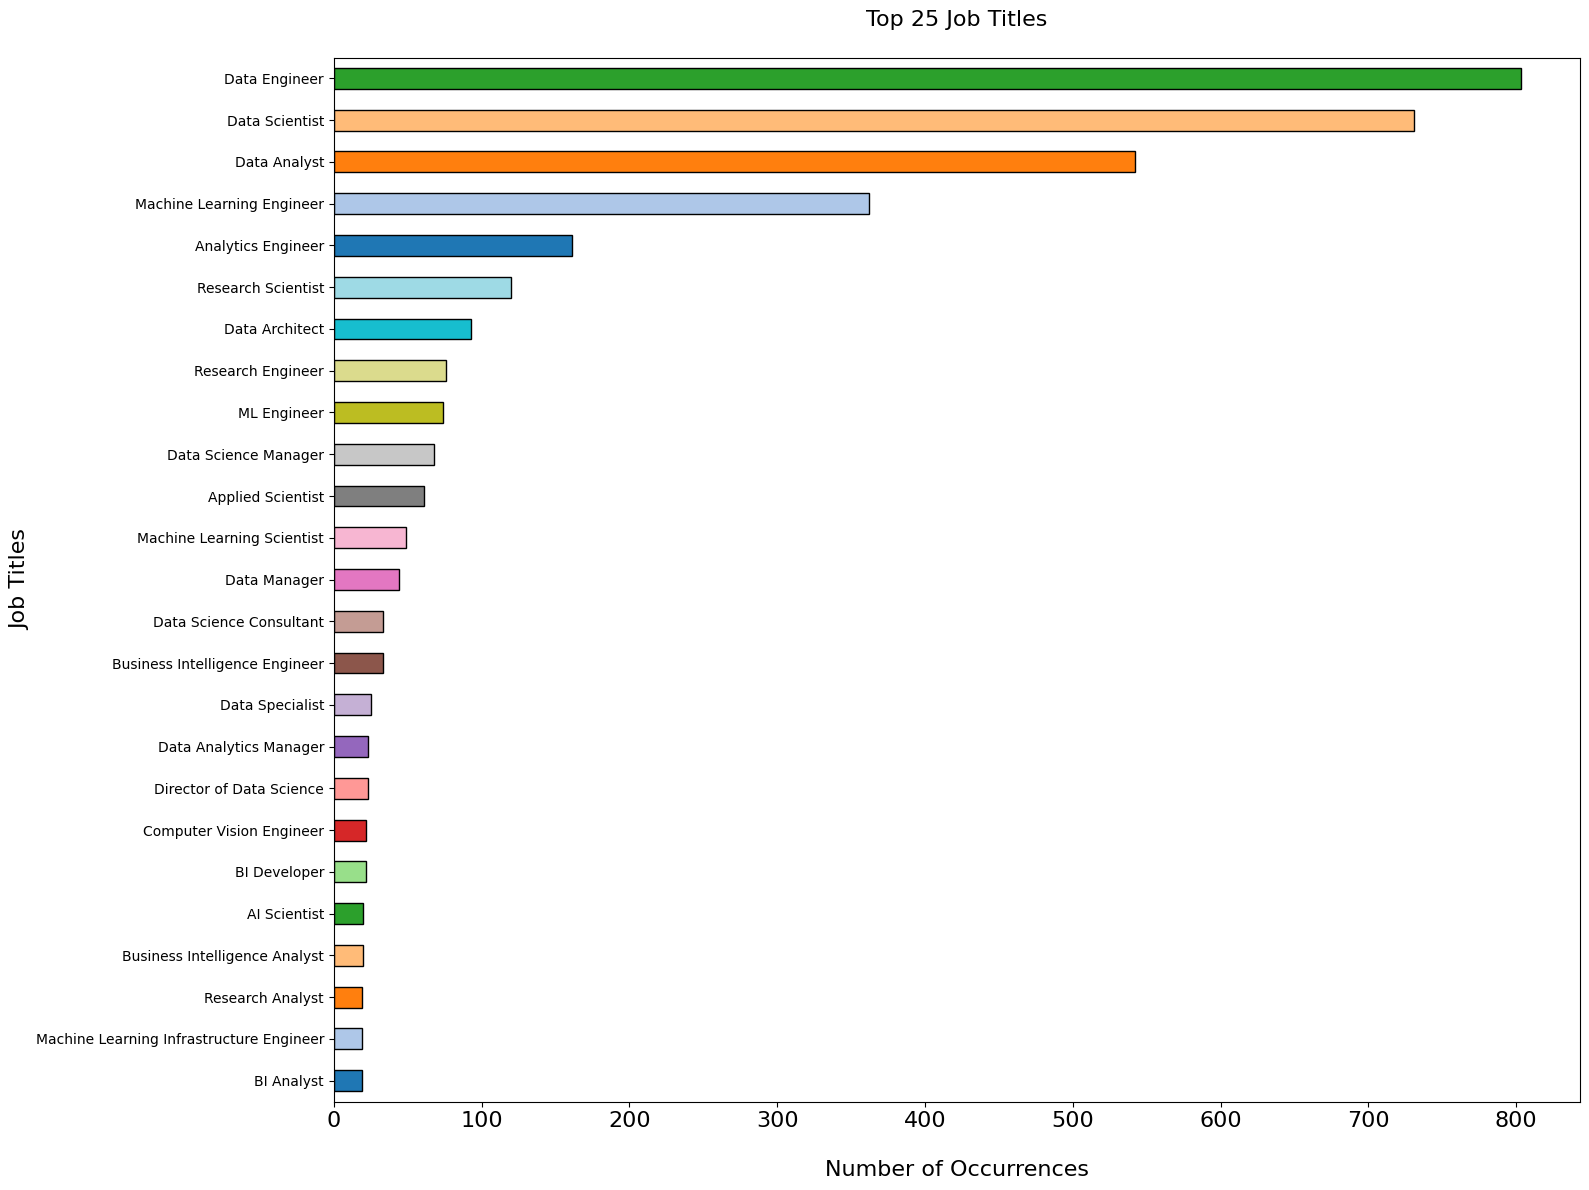

In [74]:
plt.figure(figsize = (16, 12))
top_25_job_title.sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Job Titles', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Top 25 Job Titles\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [75]:
df["Employment Type"].value_counts()


Employment Type
Full-Time    3909
Contract       18
Part-Time      13
Freelance      11
Name: count, dtype: int64

Most of people work Full-Time

In [76]:
df["Experience Level"].value_counts()


Experience Level
Senior       2493
Mid           954
Entry         330
Executive     174
Name: count, dtype: int64

There is mostly Senior employees

In [77]:
df["Expertise Level"].value_counts()


Expertise Level
Expert          2493
Intermediate     954
Junior           330
Director         174
Name: count, dtype: int64

Same as above there are mostly Experts employees

In [78]:
df["Company Size"].value_counts()


Company Size
Medium    3309
Large      479
Small      163
Name: count, dtype: int64

Medium size companies are main business size

In [79]:
df["Year"].value_counts()


Year
2023    2642
2022    1020
2021     215
2020      74
Name: count, dtype: int64

Most of data is gathered from 2023 year

In [80]:
mean = round(df["Salary in USD"].mean())
print(f"Mean Salary in the Dataset: ${mean}")

median = round(df["Salary in USD"].median())
print(f"Median Salary in the Dataset: ${median}")

maximum = round(df["Salary in USD"].max())
print(f"Highest Salary in the Dataset: ${maximum}")

minimun = round(df["Salary in USD"].min())
print(f"Lowest Salary in the Dataset: ${minimun}")

Mean Salary in the Dataset: $142753
Median Salary in the Dataset: $136600
Highest Salary in the Dataset: $450000
Lowest Salary in the Dataset: $15000


Mean Salary for Data Scientist is 142 753 which is a high score

In [81]:
top_25_countries_highest_median_salary = df.groupby('Employee Residence')['Salary in USD'].median().nlargest(25)
print("Top 25 countries with the highest median salary:")
top_25_countries_highest_median_salary = top_25_countries_highest_median_salary.sort_values(ascending = True)
top_25_countries_highest_median_salary


Top 25 countries with the highest median salary:


Employee Residence
Australia                       83517.5
Norway                          88462.0
Tunisia                         90234.5
Lithuania                       94812.0
United Kingdom                  98432.0
Uzbekistan                     100000.0
Jersey                         100000.0
Iraq                           100000.0
Algeria                        100000.0
"Iran, Islamic Republic of"    100000.0
Ireland                        102569.0
Switzerland                    104697.0
Sweden                         105000.0
Dominican Republic             110000.0
United Arab Emirates           115000.0
Bosnia and Herzegovina         120000.0
New Zealand                    125000.0
China                          125404.0
Canada                         125962.0
Saudi Arabia                   134999.0
United States                  150000.0
Puerto Rico                    160000.0
Malaysia                       200000.0
Qatar                          300000.0
Israel               

Israel is country offering the highest median salary

In [82]:
top_25_countries_lowest_median_salary = df.groupby('Employee Residence')['Salary in USD'].median().nsmallest(25)
print("Top 25 countries with the least median salary:")
top_25_countries_lowest_median_salary = top_25_countries_lowest_median_salary.sort_values(ascending = False)
top_25_countries_lowest_median_salary

Top 25 countries with the least median salary:


Employee Residence
Kuwait                      50000.0
Armenia                     50000.0
Central African Republic    49216.0
"Korea, Republic of"        47000.0
Egypt                       46400.0
Philippines                 45760.0
American Samoa              45555.0
Poland                      45465.0
Viet Nam                    44200.0
Estonia                     41459.5
Pakistan                    40000.0
Hungary                     35735.0
South Africa                34482.0
Ghana                       33000.0
India                       30523.0
Denmark                     28609.0
Malta                       28369.0
Peru                        27000.0
Thailand                    26957.0
Serbia                      25532.0
Turkey                      25000.0
Honduras                    20000.0
Costa Rica                  20000.0
Ecuador                     16000.0
Indonesia                   15000.0
Name: Salary in USD, dtype: float64

In [83]:
median_salary_by_company_size = df.groupby('Company Size')['Salary in USD'].median()
print("Median salary for each company size:")
print(median_salary_by_company_size)

Median salary for each company size:
Company Size
Large     100800.0
Medium    143000.0
Small      75000.0
Name: Salary in USD, dtype: float64


In [84]:
unique_job_titles = df['Job Title'].nunique()
print(f'Number of unique job titles: {unique_job_titles}')

Number of unique job titles: 120


In [85]:
average_salary = df['Salary in USD'].mean()
print(f'Average salary in USD: {average_salary:.2f}')

Average salary in USD: 142753.11


In [86]:
highest_salary = df['Salary in USD'].max()
job_title_highest_salary = df[df['Salary in USD'] == highest_salary]['Job Title'].values[0]
print(f'Highest salary: {highest_salary} USD (Job Title: {job_title_highest_salary})')

Highest salary: 450000 USD (Job Title: Research Scientist)


In [87]:
canadian_employees = df[df['Employee Residence'] == 'Canada']
num_canadian_employees = len(canadian_employees)
print(f'Number of employees in Canada: {num_canadian_employees}')

Number of employees in Canada: 144


In [88]:
median_junior_salary = df[df['Experience Level'] == 'Entry']['Salary in USD'].median()
print(f'Median salary for Junior-level positions: {median_junior_salary}')

Median salary for Junior-level positions: 70000.0


In [89]:
common_currency = df['Salary Currency'].mode()[0]
print(f'Most common salary currency: {common_currency}')

Most common salary currency: United States Dollar


In [90]:
average_senior_salary = df[df['Experience Level'] == 'Senior']['Salary in USD'].mean()
print(f'Average salary for Senior-level positions: {average_senior_salary:.2f} USD')

Average salary for Senior-level positions: 160260.30 USD


In [91]:
lowest_salary = df['Salary in USD'].min()
job_title_lowest_salary = df[df['Salary in USD'] == lowest_salary]['Job Title'].values[0]
print(f'Lowest salary: {lowest_salary} USD (Job Title: {job_title_lowest_salary})')

Lowest salary: 15000 USD (Job Title: Business Intelligence Developer)


In [92]:
highest_us_salary = df[df['Employee Residence'] == 'United States']['Salary in USD'].max()
print(f'Highest salary in USD for employees in the United States: {highest_us_salary}')

Highest salary in USD for employees in the United States: 450000


In [93]:
average_medium_salary = df[df['Company Size'] == 'Medium']['Salary in USD'].mean()
print(f'Average salary for employees in Medium-sized companies: {average_medium_salary:.2f} USD')

Average salary for employees in Medium-sized companies: 149270.86 USD


In [94]:
ml_engineer_us_salary_range = df[(df['Job Title'] == 'Machine Learning Engineer') & (df['Company Location'] == 'United States')]['Salary in USD'].agg(['min', 'max'])
print(f'Salary range for Machine Learning Engineers in the United States: {ml_engineer_us_salary_range}')

Salary range for Machine Learning Engineers in the United States: min     81000
max    392000
Name: Salary in USD, dtype: int64


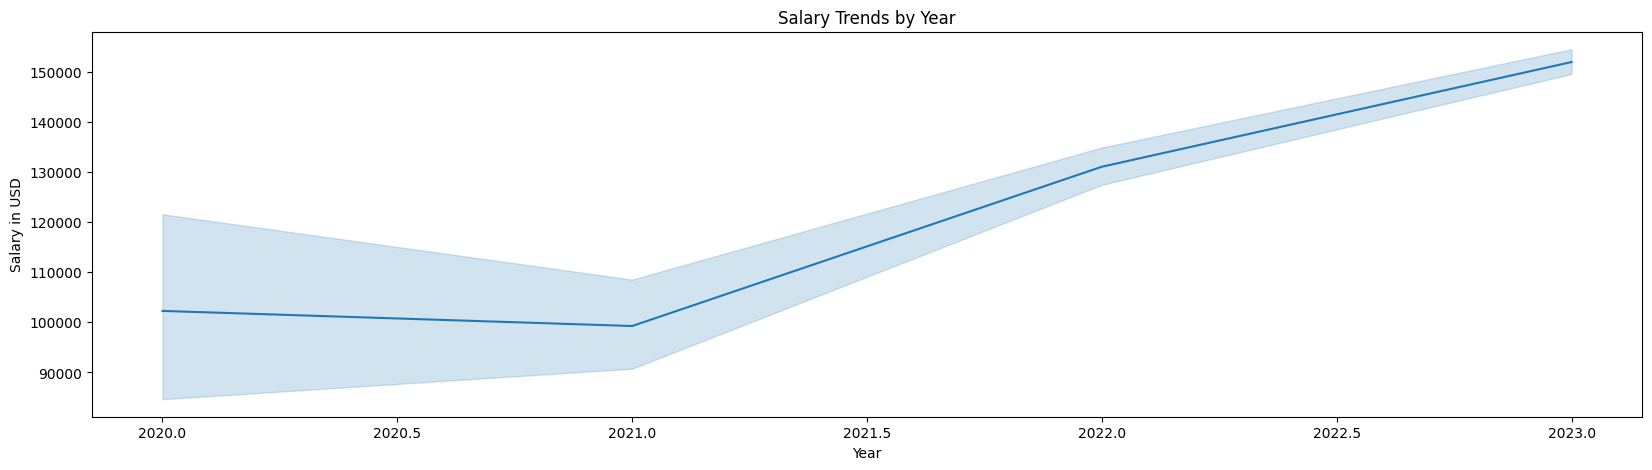

In [95]:
# Line plot for Salary by Year
plt.figure(figsize = (20, 5))
sns.lineplot(x='Year', y='Salary in USD', data = df)
plt.title('Salary Trends by Year')
plt.show()

From above plot it shows that the average salary was growing over time and lovest and highiest salaries are much closer to mean salary

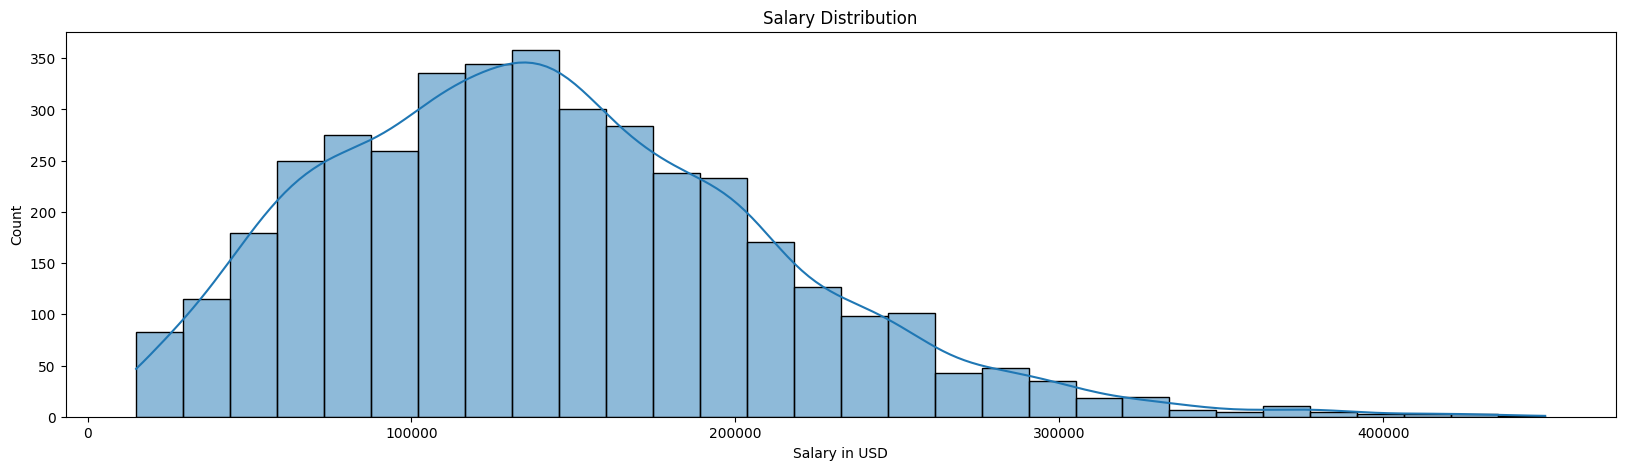

In [96]:
# Histogram for Salary distribution
plt.figure(figsize = (20, 5))
sns.histplot(df['Salary in USD'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.show()

Based in this distribution plot we can acknowlede that most of salaries are in range from 60-200 k

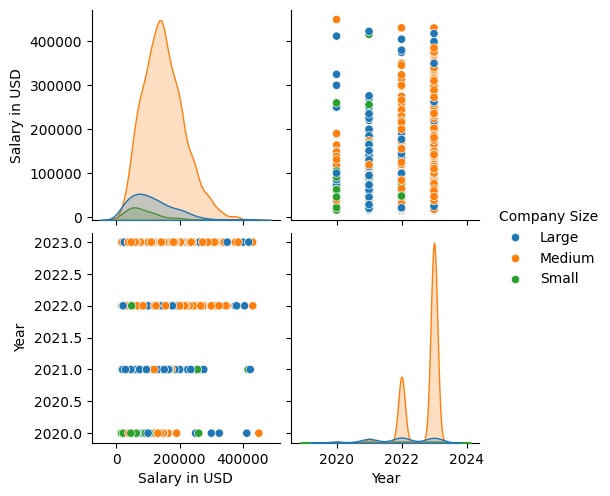

In [97]:
sns.pairplot(df[['Salary in USD', 'Year', 'Company Size']], hue='Company Size')
plt.show();

This pairplot shows that most of salaries in dataset comes from medium sized companies and there is much increase in slaries amount in mid size companies from 2022

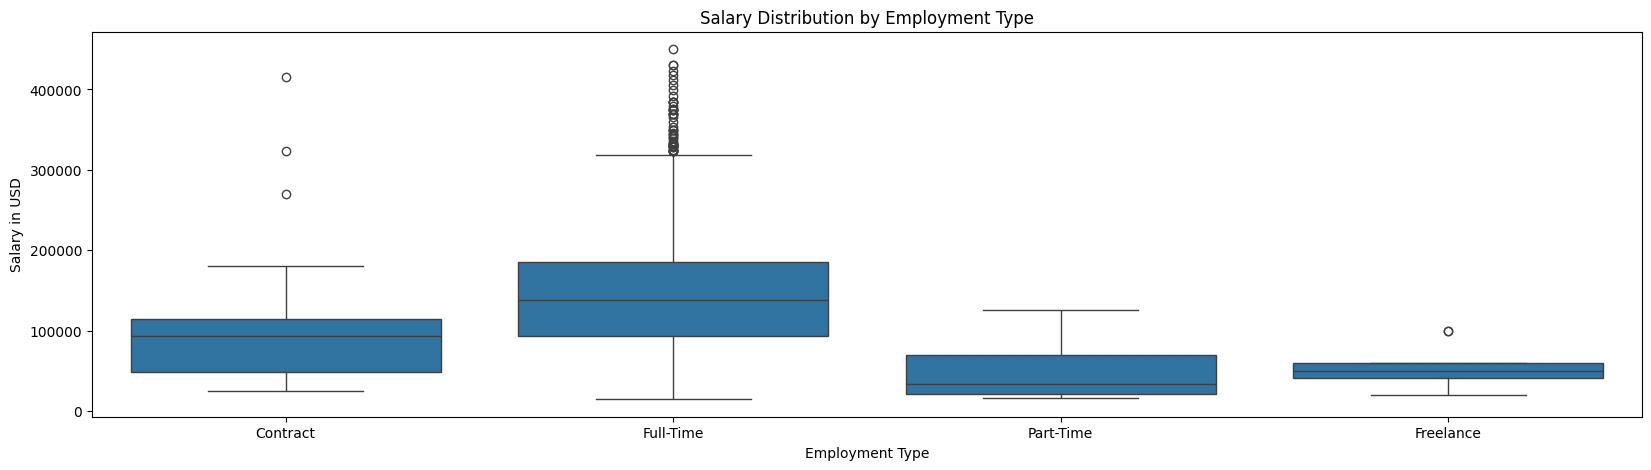

In [98]:
# Box plot for Salary distribution by Employment Type
plt.figure(figsize=(20, 5))
sns.boxplot(x='Employment Type', y='Salary in USD', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

Highiest salaries are spoted for full-time positions and contracts

c:\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


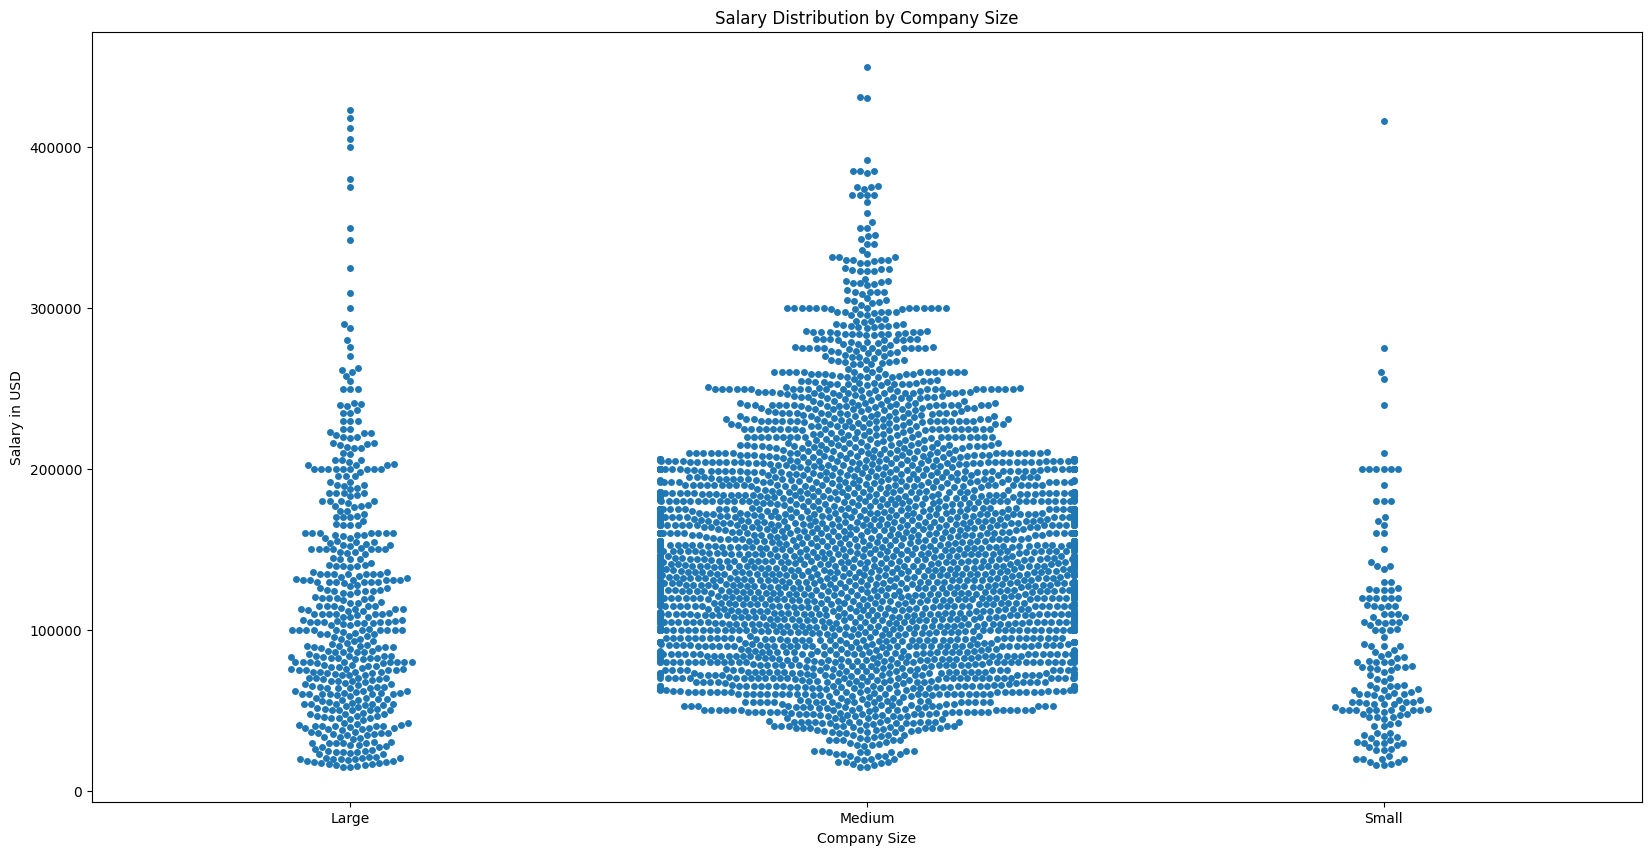

In [99]:
# Box plot for Salary distribution by Company Size
plt.figure(figsize=(20, 10))
sns.swarmplot(x='Company Size', y='Salary in USD', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

On this plot we can interpret that medium sized companies are responsible for most salaries in data set and they have vast range of amounts

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2523176231.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Expertise Level'] == level], x='Salary in USD', fill=True, palette='Set3')


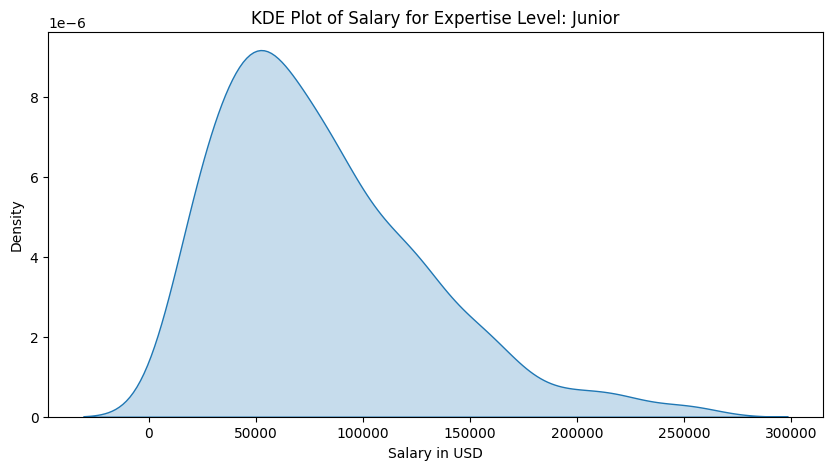

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2523176231.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Expertise Level'] == level], x='Salary in USD', fill=True, palette='Set3')


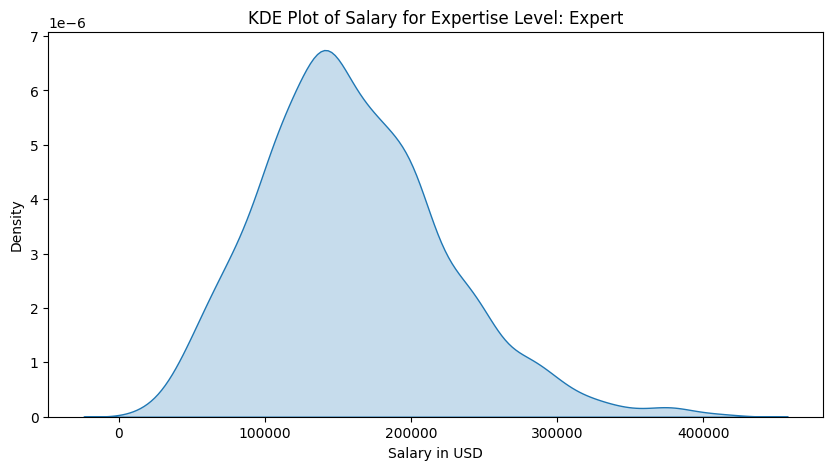

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2523176231.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Expertise Level'] == level], x='Salary in USD', fill=True, palette='Set3')


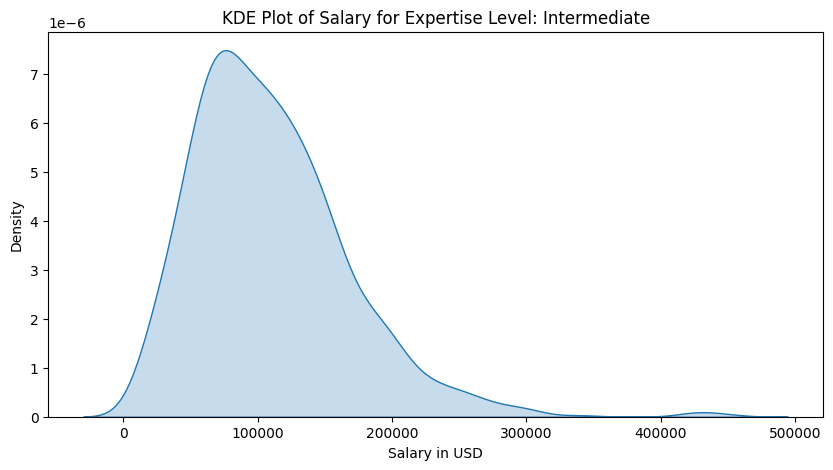

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2523176231.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Expertise Level'] == level], x='Salary in USD', fill=True, palette='Set3')


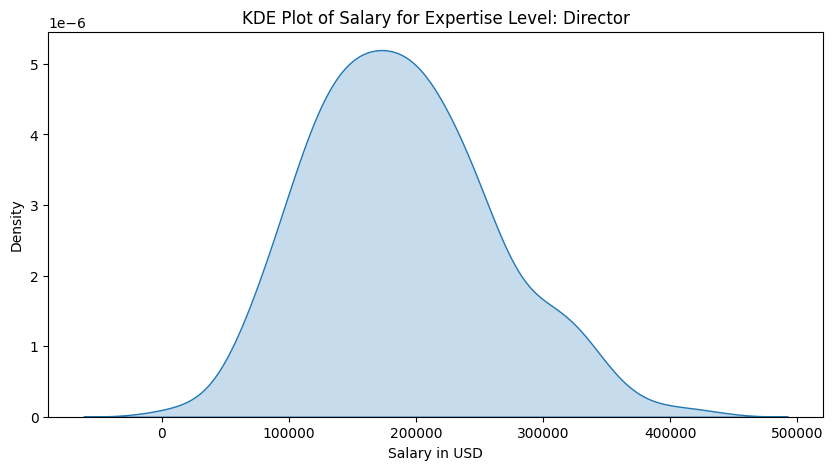

In [100]:
# Get unique expertise levels
expertise_levels = df['Expertise Level'].unique()

# Create a separate KDE plot for each expertise level
for level in expertise_levels:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df[df['Expertise Level'] == level], x='Salary in USD', fill=True, palette='Set3')
    plt.title(f'KDE Plot of Salary for Expertise Level: {level}')
    plt.xlabel('Salary in USD')
    plt.show()

From above distribution we can see that director salaries are highiest in data set

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2959004401.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Company Size'] == size], x='Salary in USD', fill=True, palette='Set3')


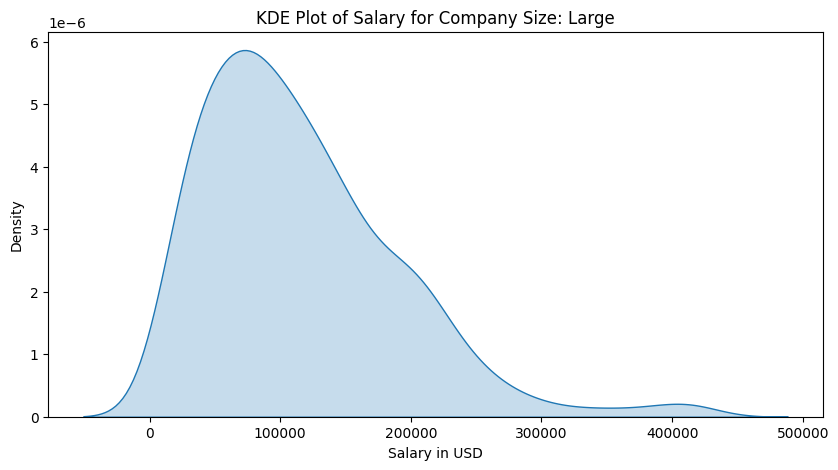

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2959004401.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Company Size'] == size], x='Salary in USD', fill=True, palette='Set3')


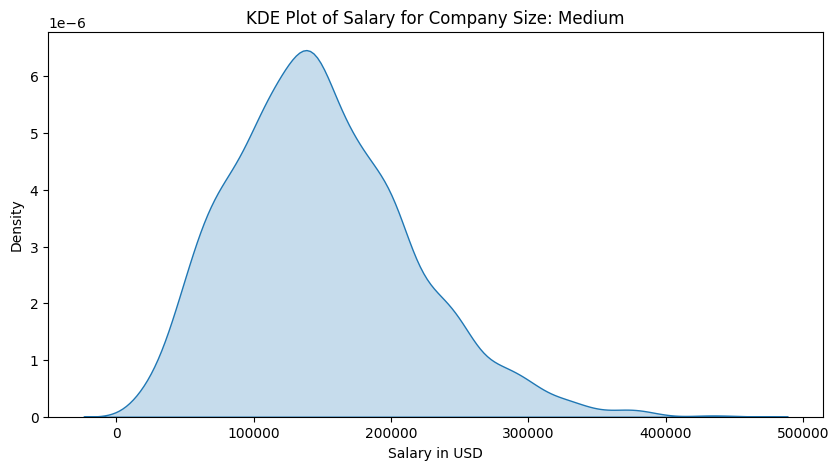

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\2959004401.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Company Size'] == size], x='Salary in USD', fill=True, palette='Set3')


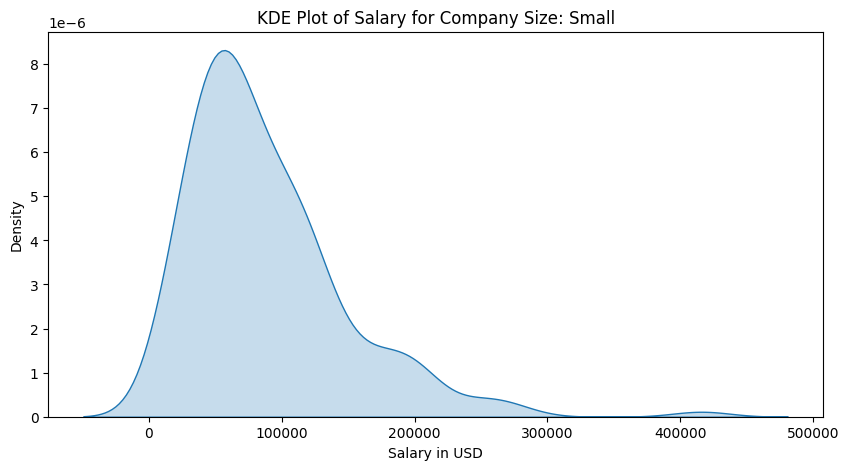

In [101]:
# Get unique company sizes
company_sizes = df['Company Size'].unique()

# Create a separate KDE plot for each company size
for size in company_sizes:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df[df['Company Size'] == size], x='Salary in USD', fill=True, palette='Set3')
    plt.title(f'KDE Plot of Salary for Company Size: {size}')
    plt.xlabel('Salary in USD')
    plt.show()

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\1144072202.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Year'] == year], x='Salary in USD', fill=True, palette='Set1')


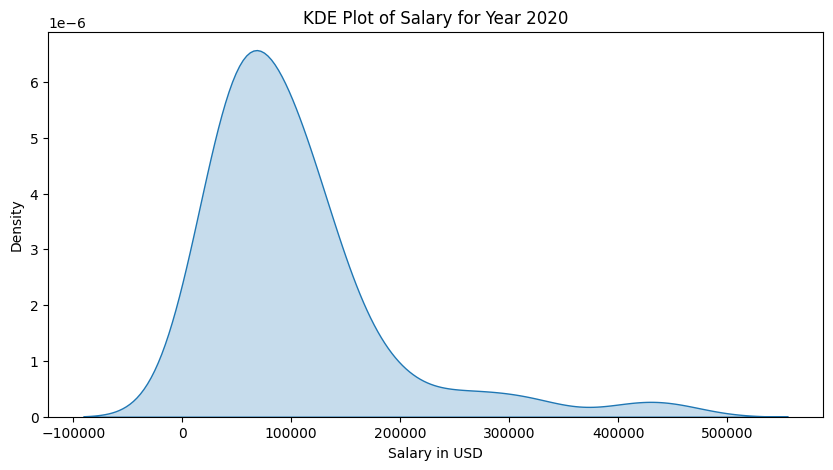

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\1144072202.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Year'] == year], x='Salary in USD', fill=True, palette='Set1')


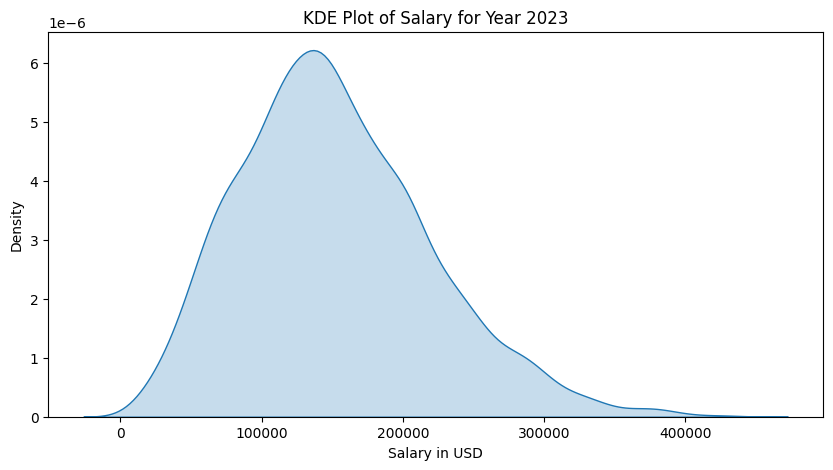

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\1144072202.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Year'] == year], x='Salary in USD', fill=True, palette='Set1')


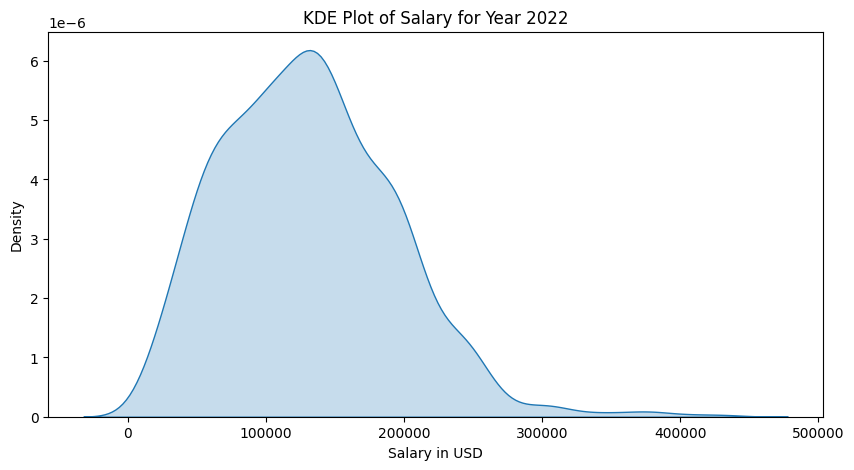

C:\Users\adamm\AppData\Local\Temp\ipykernel_19660\1144072202.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[df['Year'] == year], x='Salary in USD', fill=True, palette='Set1')


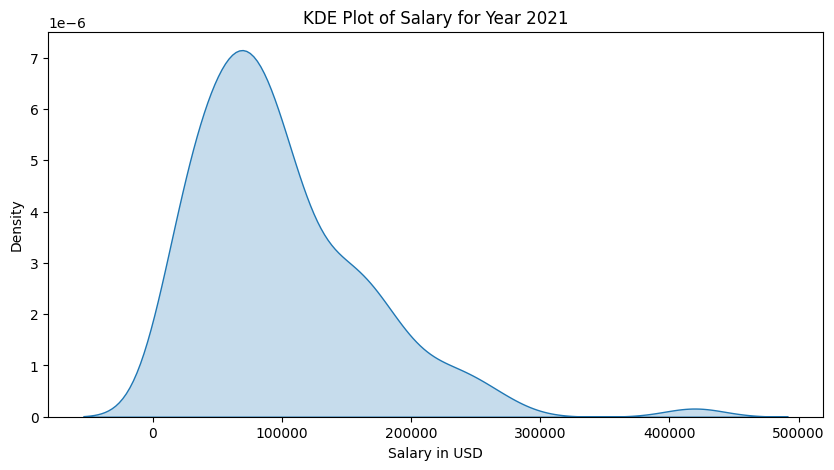

In [102]:
# Get unique years
years = df['Year'].unique()

# Create a separate KDE plot for each year
for year in years:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df[df['Year'] == year], x='Salary in USD', fill=True, palette='Set1')
    plt.title(f'KDE Plot of Salary for Year {year}')
    plt.xlabel('Salary in USD')
    plt.show()

Those distributions present change in salaries increase with each year

------------Data visualization created using Tableau------------

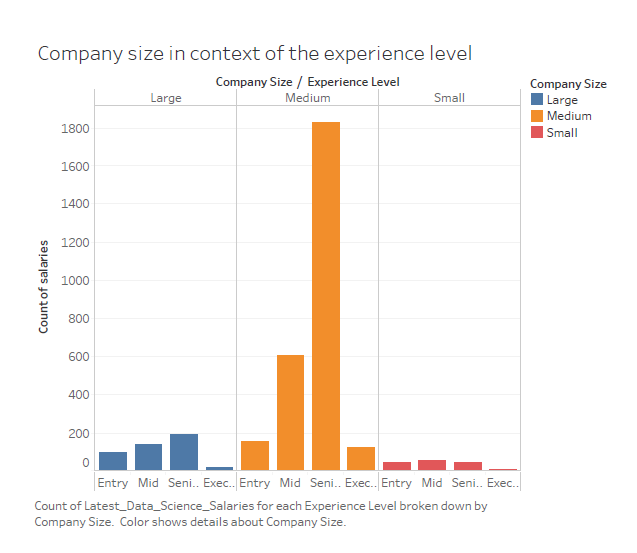

In [103]:
from IPython.display import Image

Image("./1.png")

From this graph we can see that most of senior roles are most popular in large and medium-sized companies and executives are smallest group

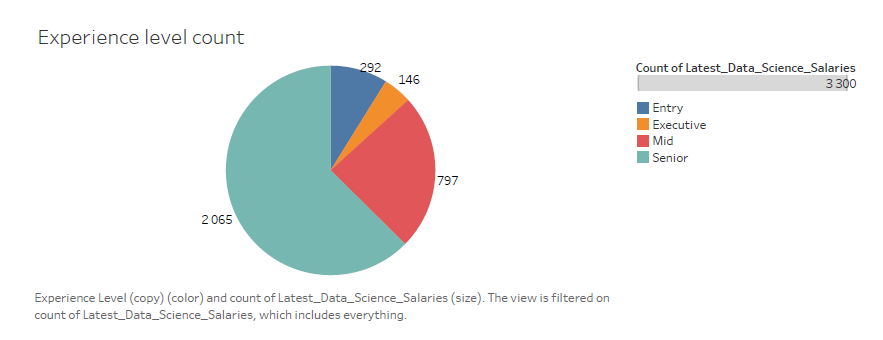

In [104]:
Image("./6.png")


This is total count of experience levels in a form of pie chart

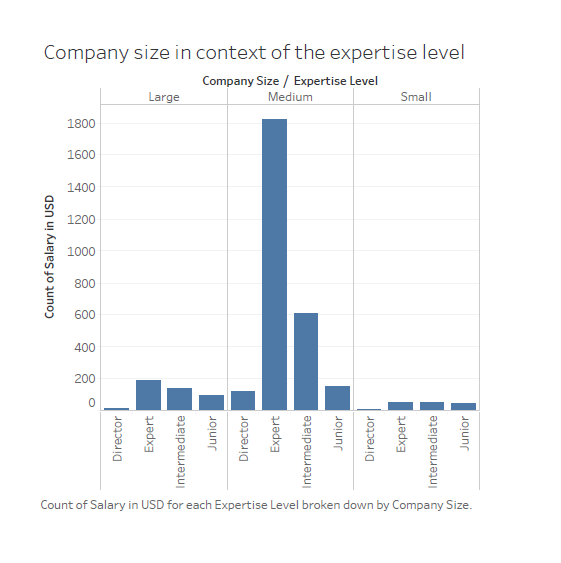

In [105]:
Image("./2.png")

This plot is strongly conneced to the previous one with most data describing Experts as biggest group and directors as smallest one

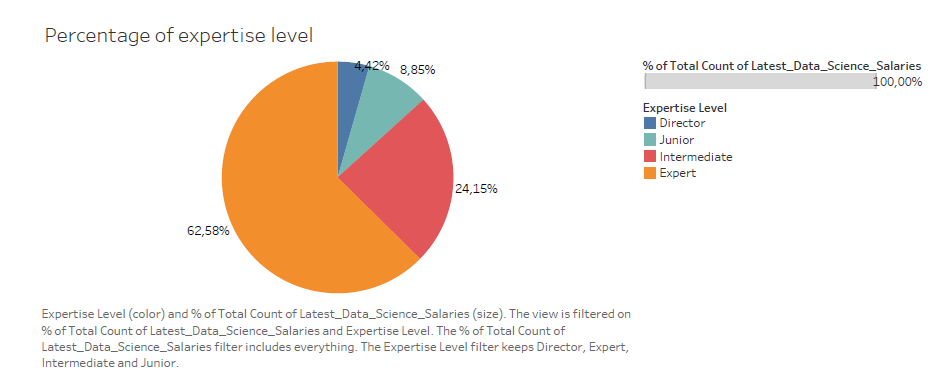

In [106]:
Image("./7.png")

Here is overall percentage pie chart of expertise level in all companies

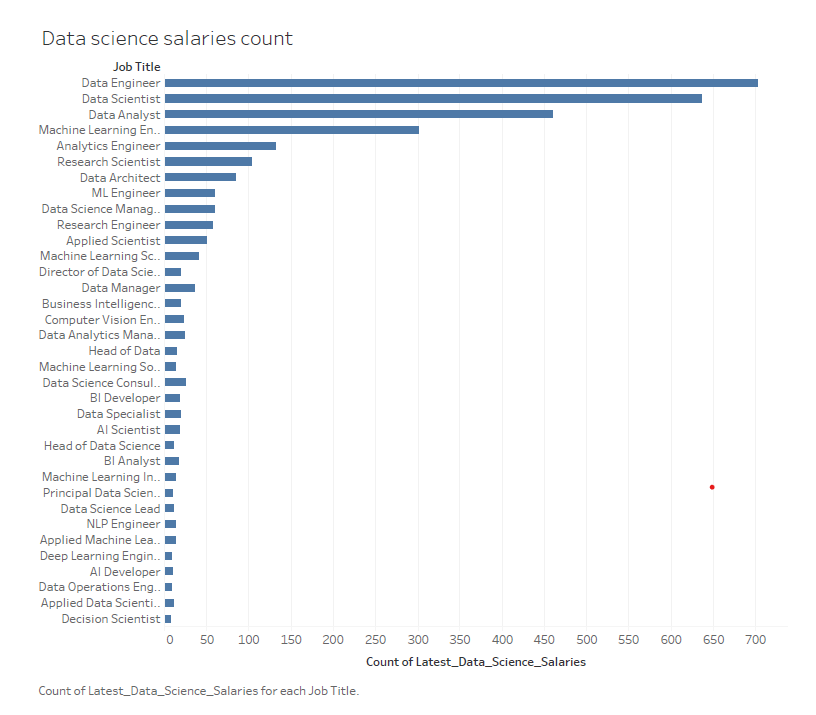

In [107]:
Image("./3.png")

Data Engineering and Data Science positions are two of best paid positions in given dataset

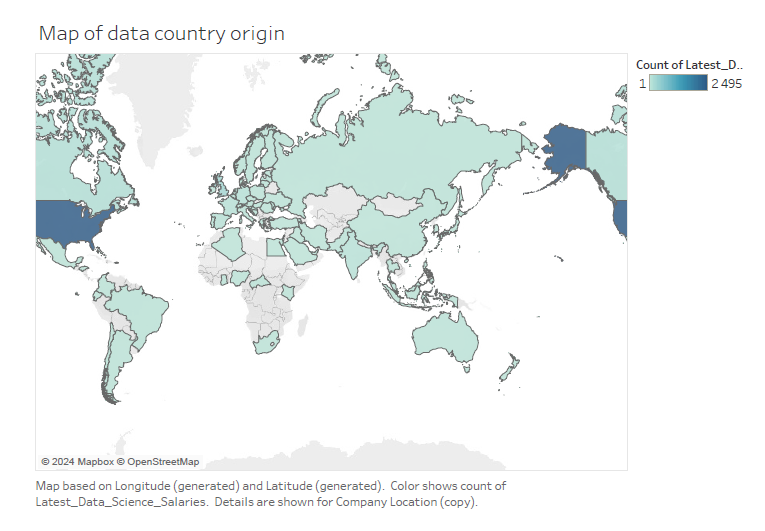

In [108]:
Image("./4.png")

From above heat map we can understand that most of data origins from USA so the salaries amounts could be biased

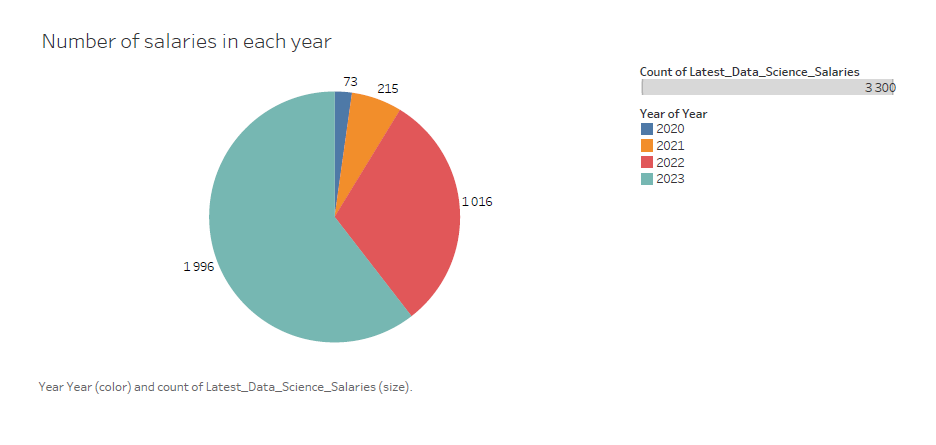

In [109]:
Image("./5.png")

As previously spotted in each year amount of data was increasing

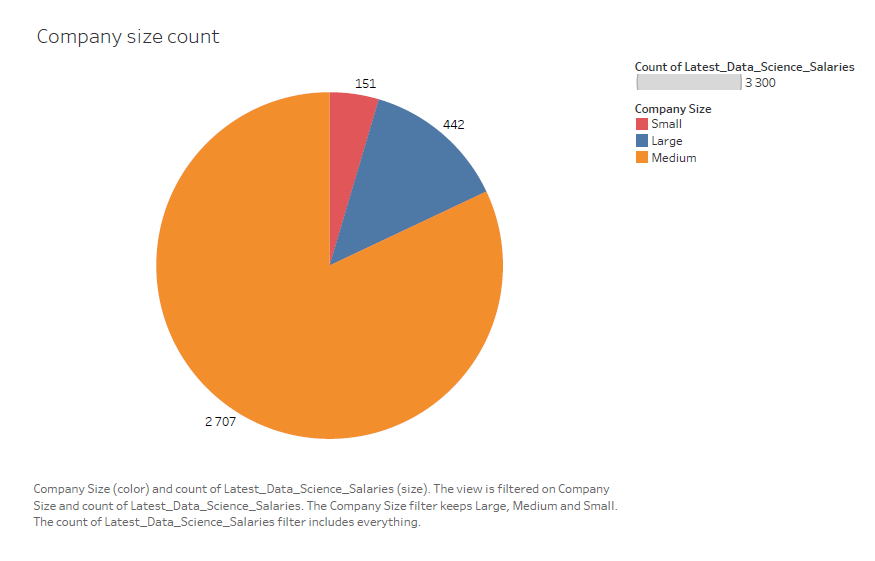

In [110]:
Image("./8.png")

Here we can see that companies size stored in data set are mostly medium size 

In [111]:
mapping_dict = {'Small': 1, 'Medium': 2, 'Large': 3}
df['Company Size Number'] = df['Company Size'].map(mapping_dict)

mapping_dict = {'Junior': 1, 'Intermediate': 2, 'Expert': 3, 'Director': 4}
df['Expertise Level Number'] = df['Expertise Level'].map(mapping_dict)

mapping_dict = {'Entry': 1, 'Mid': 2, 'Senior': 3, 'Executive': 4}
df['Experience Level Number'] = df['Experience Level'].map(mapping_dict)

mapping_dict = {'Full-Time': 1, 'Part-Time': 2, 'Contract': 3, 'Freelance': 4}
df['Employment Type Number'] = df['Employment Type'].map(mapping_dict)


def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

# Assuming you have a pandas DataFrame df and the column is 'country'
df['Company Location Continent'] = df['Company Location'].apply(get_continent)
df['Employee Residence Continent'] = df['Employee Residence'].apply(get_continent)

# Map continents to numbers
mapping_dict = {'AF': 1, 'AN': 2, 'AS': 3, 'EU': 4, 'NA': 5, 'OC': 6, 'SA': 7, 'Unknown': 8}
df['Company Location Continent'] = df['Company Location Continent'].map(mapping_dict)
df['Employee Residence Continent'] = df['Employee Residence Continent'].map(mapping_dict)



Here we map Employment Type, Experience Level, Expertise Level and Company size to use machine learning algorithms to predict salary based on those IVs.

In [112]:
df.isnull().sum()

Job Title                       0
Employment Type                 0
Experience Level                0
Expertise Level                 0
Salary                          0
Salary Currency                 0
Company Location                0
Salary in USD                   0
Employee Residence              0
Company Size                    0
Year                            0
Company Size Number             0
Expertise Level Number          0
Experience Level Number         0
Employment Type Number          0
Company Location Continent      0
Employee Residence Continent    0
dtype: int64

In [113]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Company Size Number,Expertise Level Number,Experience Level Number,Employment Type Number,Company Location Continent,Employee Residence Continent
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020,3,1,1,3,5,5
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023,2,1,1,1,4,4
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023,1,3,3,1,4,4
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023,2,3,3,1,5,5
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023,2,3,3,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020,3,3,3,1,5,5
3947,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021,3,2,2,1,5,5
3948,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020,1,1,1,1,5,5
3949,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020,3,1,1,3,5,5


Here is mapped dataframe

In [114]:
# Classify variables
categorical_columns = df.select_dtypes(include=['object']).columns
non_categorical_columns = df.select_dtypes(exclude=['object']).columns


# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary Currency', 'Company Location', 'Employee Residence',
       'Company Size'],
      dtype='object')

Non-Categorical Columns:
Index(['Salary', 'Salary in USD', 'Year', 'Company Size Number',
       'Expertise Level Number', 'Experience Level Number',
       'Employment Type Number', 'Company Location Continent',
       'Employee Residence Continent'],
      dtype='object')


In [115]:

# Linear regression
# Define response variable
y = df["Salary in USD"]

# Define explanatory variables
x = df[non_categorical_columns].drop(['Salary in USD'], axis=1)

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print("\nLinear Regression Model Summary:")
model.summary()


Linear Regression Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Salary in USD   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.00e-235
Time:                        12:28:48   Log-Likelihood:                -49030.
No. Observations:                3951   AIC:                         9.808e+04
Df Residuals:                    3943   BIC:                         9.813e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.281e+07   2.93e+06     -7.775      0.000   -2.86e+07   -1.71e+07
Salary                           0.0024      0.001      1.695      0.090      -0.000       0.005
Year                          1.124e+04   1450.851      7.749      0.000    8398.439    1.41e+04
Company Size Number           2647.1156   2448.579      1.081      0.280   -2153.485    7447.717
Expertise Level Number        1.772e+04    701.616     25.255      0.000    1.63e+04    1.91e+04
Experience Level Number       1.772e+04    701.616     25.255      0.000    1.63e+04    1.91e+04
Employment Type Number       -5513.2117   4511.320     -1.222      0.222   -1.44e+04    3331.528
Company Location Continent    1.337e+04   3443.352      3.883      0.000    6621.006    2.01e+04
Employee Residence Continent  1.196e+04   3177.512      3.763      0.000    5726.858    1.82e+04
==============================================================================
Omnibus:                      523.481   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1041.861
Skew:                           0.824   Prob(JB):                    5.79e-227
Kurtosis:                       4.900   Cond. No.                     8.94e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model summary shows that only 24.5 percent of variance is Salary in USD can be explained by the IVs and IV like Salary, Company Size Number Employment Type Number are not significant in predicting DV. In this case, 'Year', 'Expertise Level Number', 'Experience Level Number', 'Company Location Continent', and 'Employee Residence Continent' are significant at the 5% level.

In [116]:
# Bivariate correlation table
correlation_table = df[non_categorical_columns].corr()

print("Bivariate Correlation Table:")
correlation_table

Bivariate Correlation Table:


,Salary,Salary in USD,Year,Company Size Number,Expertise Level Number,Experience Level Number,Employment Type Number,Company Location Continent,Employee Residence Continent
Salary,1.000000,-0.017316,-0.099480,0.109044,-0.019175,-0.019175,-0.003455,-0.107946,-0.113217
Salary in USD,-0.017316,1.000000,0.215321,-0.037332,0.426182,0.426182,-0.084096,0.293385,0.299096
Year,-0.099480,0.215321,1.000000,-0.164606,0.189656,0.189656,-0.107613,0.159857,0.174181
Company Size Number,0.109044,-0.037332,-0.164606,1.000000,-0.072382,-0.072382,-0.067277,-0.045534,-0.059349
Expertise Level Number,-0.019175,0.426182,0.189656,-0.072382,1.000000,1.000000,-0.088014,0.186496,0.196207
Experience Level Number,-0.019175,0.426182,0.189656,-0.072382,1.000000,1.000000,-0.088014,0.186496,0.196207
Employment Type Number,-0.003455,-0.084096,-0.107613,-0.067277,-0.088014,-0.088014,1.000000,-0.062145,-0.132498
Company Location Continent,-0.107946,0.293385,0.159857,-0.045534,0.186496,0.186496,-0.062145,1.000000,0.877703
Employee Residence Continent,-0.113217,0.299096,0.174181,-0.059349,0.196207,0.196207,-0.132498,0.877703,1.000000


From this correlation table we can understand that most of coeficients have negative correlation with other ones

In [117]:

# drop salary to avioud redundancy in IVs and DVs
df = df.drop("Salary", axis=1)

# Assuming df is your DataFrame and 'Salary in USD' is the target variable
X = df[["Company Size Number", "Expertise Level Number", "Experience Level Number", "Employment Type Number", "Employee Residence Continent", "Company Location Continent"]]
y = df['Salary in USD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a PolynomialFeatures object with degree 2 (you can adjust this as needed)
poly = PolynomialFeatures(degree=2)

# Transform both the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the polynomial features
model.fit(X_train_poly, y_train)

# Now you can use the model to make predictions
predictions = model.predict(X_test_poly)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate the Root Mean Squared Error
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Calculate the R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 3023017501.2441273
Mean Absolute Error: 42465.82441082494
Root Mean Squared Error: 54981.97433017595
R-squared: 0.32015028802543033


As previously OLS analysed IVs are responsible only for 24,5 % for DV variation, so machine learning algorithm also presents rather poor results with 32 % of DV variability explanation by IV and high root mean squared error, mean squared error and mean absolute error 

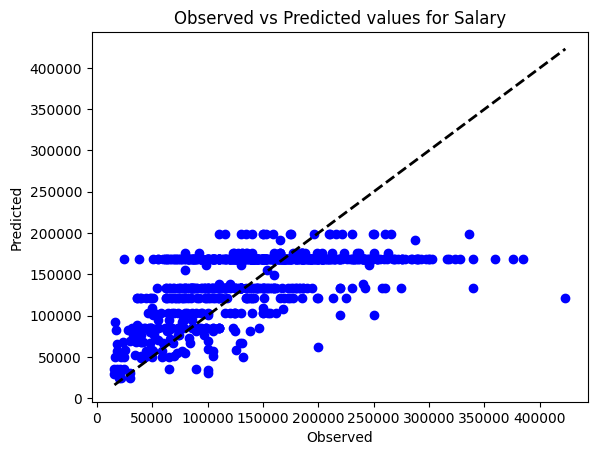

In [118]:
# Scatter plot of observed vs predicted values
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted values for Salary')
plt.show()

In [119]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Company Size Number,Expertise Level Number,Experience Level Number,Employment Type Number,Company Location Continent,Employee Residence Continent
0,Staff Data Analyst,Contract,Entry,Junior,Canadian Dollar,Canada,44753,Canada,Large,2020,3,1,1,3,5,5
1,AI Engineer,Full-Time,Entry,Junior,United States Dollar,Germany,35000,Croatia,Medium,2023,2,1,1,1,4,4
2,AI Developer,Full-Time,Senior,Expert,Euro,Italy,53984,Italy,Small,2023,1,3,3,1,4,4
3,Machine Learning Engineer,Full-Time,Senior,Expert,United States Dollar,United States,226600,United States,Medium,2023,2,3,3,1,5,5
4,Machine Learning Engineer,Full-Time,Senior,Expert,United States Dollar,United States,140100,United States,Medium,2023,2,3,3,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,Data Scientist,Full-Time,Senior,Expert,United States Dollar,United States,412000,United States,Large,2020,3,3,3,1,5,5
3947,Principal Data Scientist,Full-Time,Mid,Intermediate,United States Dollar,United States,151000,United States,Large,2021,3,2,2,1,5,5
3948,Data Scientist,Full-Time,Entry,Junior,United States Dollar,United States,105000,United States,Small,2020,1,1,1,1,5,5
3949,Business Data Analyst,Contract,Entry,Junior,United States Dollar,United States,100000,United States,Large,2020,3,1,1,3,5,5


In [122]:

# Define response variable
y = df["Salary in USD"]

# Define explanatory variables
non_categorical_columns = ['Year', 'Company Size Number','Expertise Level Number', 'Experience Level Number','Employment Type Number', 'Company Location Continent','Employee Residence Continent']
X = df[non_categorical_columns].drop('Salary in USD', axis=1, errors='ignore')

lab_enc = preprocessing.LabelEncoder()
X_encoded = X.apply(preprocessing.LabelEncoder().fit_transform)
y_encoded = lab_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Decision Tree without pruning for Regression
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_regressor = dt_regressor.predict(X_test)

# Print Regression Metrics
print("Decision Tree without Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor))

# Decision Tree with pruning for Regression
dt_regressor_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=0.01)
dt_regressor_pruned.fit(X_train, y_train)
y_pred_regressor_pruned = dt_regressor_pruned.predict(X_test)

# Print Regression Metrics for Pruned Tree
print("Decision Tree with Pruning (Regression):")
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_regressor_pruned))

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_regressor)
print(f"Mean Absolute Error (Without Pruning): {mae}")

mae_pruned = mean_absolute_error(y_test, y_pred_regressor_pruned)
print(f"Mean Absolute Error (With Pruning): {mae_pruned}")

# Calculate the Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_regressor, squared=False)
print(f"Root Mean Squared Error (Without Pruning): {rmse}")

rmse_pruned = mean_squared_error(y_test, y_pred_regressor_pruned, squared=False)
print(f"Root Mean Squared Error (With Pruning): {rmse_pruned}")

# Calculate the R-squared
r2 = r2_score(y_test, y_pred_regressor)
print(f"R-squared (Without Pruning): {r2}")

r2_pruned = r2_score(y_test, y_pred_regressor_pruned)
print(f"R-squared (With Pruning): {r2_pruned}")

Decision Tree without Pruning (Regression):
Mean Squared Error: 99583.36225027443
Decision Tree with Pruning (Regression):
Mean Squared Error: 99584.26363530043
Mean Absolute Error (Without Pruning): 257.46237765787373
Mean Absolute Error (With Pruning): 257.4642318508784
Root Mean Squared Error (Without Pruning): 315.5683162966055
Root Mean Squared Error (With Pruning): 315.56974448654046
R-squared (Without Pruning): 0.36364368184953366
R-squared (With Pruning): 0.36363792183055643


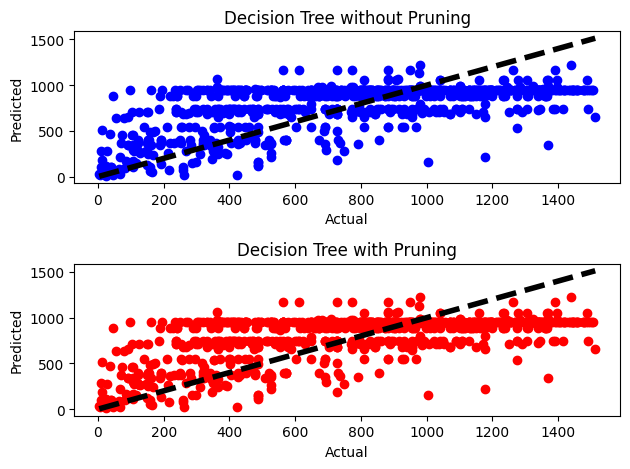

In [121]:

# Create a figure and a set of subplots
fig, axs = plt.subplots(2)

# Scatter plot for Decision Tree without pruning
axs[0].scatter(y_test, y_pred_regressor, color='blue')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Decision Tree without Pruning')

# Scatter plot for Decision Tree with pruning
axs[1].scatter(y_test, y_pred_regressor_pruned, color='red')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Decision Tree with Pruning')

# Display the figure
plt.tight_layout()
plt.show()

In decision tree model we can see that it better predict Salary in USD as OLS and linear regression model. Pruning does not improve much our prediction metrics.